##### Kindly cite this notebook in your publications if you use it for calculations.

##### Cite as : NyroModellerNotebook v1, Girinath G. Pillai : https://github.com/giribio/ModellerNotebooks 
##### DOI: https://doi.org/10.5281/zenodo.4294751

Used the tutorial from Salilab : https://salilab.org/modeller/tutorial/advanced.html

In [1]:
# Install anaconda from the web
# https://www.anaconda.com/products/individual

###### nglview, numpy and matplotlib required for result analysis and ploting

Install MODELLER using the following commands 
Ensure Anaconda is installed, therefore python3, conda, pip3, jupyter notebook and others are installed

TESTED in LINUX and MACOSX, In Windows this notebook should work, but change commands for curl/wget/cat/etc as per the OS requirements. Create a folder and run the notebook within folder and download all supporting files.

In [2]:
conda config --add channels salilab


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install modeller

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


##### Go to https://salilab.org/modeller/ to get a license key, and then set the 'license' variable to it in the file ~//lib/modeller-9.25/modlib/modeller/config.py

## Advanced Homology Modeling
#### Multiple template modelling

Download the latest PDB sequence database from https://salilab.org/modeller/downloads/pdb_95.pir.gz

In [4]:
#To download latest PDB sequence database in PIR file
!curl https://salilab.org/modeller/downloads/pdb_95.pir.gz -o pdb_95.pir.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.5M  100 15.5M    0     0  2711k      0  0:00:05  0:00:05 --:--:-- 3511k-:--:--     0


In [5]:
#Unzip the file
!gunzip pdb_95.pir.gz

### Searching template structures related to target sequence

Which ever Target sequence, you would like to model, get the FASTA format of the sequence
And make generate PIR format which is readable by MODELLER with file extension .ali

SAMPLE
>P1;CODE ##CODE (used in next line too) - some letters to represent target sequence##
sequence:CODE:::::0.00:0.00 ##

##FASTA FORMAT SEQUENCE##
and at the end * (symbol without gap or space represents end of sequence)
Then save the file with .ali as file extension, in this example we used the following 
sequence and filename with TvLDH.ali (copy paste the following to editor and save as TvLDH.ali)


>P1;TvLDH
sequence:TvLDH:::::::0.00: 0.00
MSEAAHVLITGAAGQIGYILSHWIASGELYGDRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGFVATTDPKA
AFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTNCEIAMLHAKNLKPEN
FSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEGKTQKVVDVLDHDYVFDTFFKKI
GHRAWDILEHRGFTSAASPTKAAIQHMKAWLFGTAPGEVLSMGIPVPEGNPYGIKPGVVFSFPCNVDKEGKIHVV
EGFKVNDWLREKLDFTEKDLFHEKEIALNHLAQGG*

In [6]:
from modeller import *

log.verbose()
env = environ()

#-- Prepare the input files

#-- Read in the sequence database
sdb = sequence_db(env)
sdb.read(seq_database_file='pdb_95.pir', seq_database_format='PIR',
         chains_list='ALL', minmax_db_seq_len=(30, 4000), clean_sequences=True)

#-- Write the sequence database in binary form
sdb.write(seq_database_file='pdb_95.bin', seq_database_format='BINARY',
          chains_list='ALL')

#-- Now, read in the binary database
sdb.read(seq_database_file='pdb_95.bin', seq_database_format='BINARY',
         chains_list='ALL')

#-- Read the target sequence/alignment in .ali format
aln = alignment(env)
aln.append(file='TvLDH.ali', alignment_format='PIR', align_codes='ALL')

#-- Convert the input sequence/alignment into
#   profile format
prf = aln.to_profile()

#-- Scan sequence database to pick up homologous sequences
# *** Feel free to make changes in gap penalties, aln evalue and others if you are aware of the significance

prf.build(sdb, matrix_offset=-450, rr_file='${LIB}/blosum62.sim.mat',
          gap_penalties_1d=(-500, -50), n_prof_iterations=1,
          check_profile=False, max_aln_evalue=0.01)

#-- Write out the profile in text format
prf.write(file='build_profile.prf', profile_format='TEXT')

#-- Convert the profile back to alignment format
aln = prf.to_alignment()

#-- Write out the alignment file
aln.write(file='build_profile.ali', alignment_format='PIR')


                         MODELLER 9.25, 2020/09/03, r11894

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2020 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, Darwin Girinaths-MacBook-Pro.local 19.6.0 x86_64
Date and time of c

profile_660_> Quality of the fit between observed/expected score distributions.
              [Iteration, Chi2, nbins, KS-Stat, nscores ] =        1,        0.0182,      121,        0.0067,    67192

HISTOGRAM OF Z-SCORES:

Z:         1  -3.95000   0.00000   0.00000
Z:         1  -3.85000   0.00000   0.00000
Z:         1  -3.75000   0.00000   0.00000
Z:         1  -3.65000   0.00000   0.00000
Z:         1  -3.55000   0.00000   0.00000
Z:         1  -3.45000   0.00000   0.00000
Z:         1  -3.35000   0.00000   0.00000
Z:         1  -3.25000   0.00000   0.00000
Z:         1  -3.15000   0.00000   0.00000
Z:         1  -3.05000   0.00000   0.00000
Z:         1  -2.95000   0.00000   0.00000
Z:         1  -2.85000   0.00000   0.00000
Z:         1  -2.75000   0.00000   0.00000
Z:         1  -2.65000   0.00000   0.00000
Z:         1  -2.55000   0.00000   0.00001
Z:         1  -2.45000   0.00045   0.00004
Z:         1  -2.35000   0.00089   0.00016
Z:         1  -2.25000   0.00089   0.00055
Z:

> 6vdhA                      1   42414    5900     308     335   32.73    0.14E-04      57   159    13   191    12   176
> 4jcoA                      1   43467    5700     303     335   25.96    0.39E-04      58   274     7   320     3   287
> 1lldA                      1   44348    6650     313     335   30.67    0.30E-06      59   216    13   242     9   233
> 1hyeA                      1   45128    6800     307     335   29.28    0.13E-06      60   173     7   191     3   183
> 4wleA                      1   45463    6250     314     335   25.93    0.24E-05      61   186     5   198     2   190
> 3tl2A                      1   45519    6550     312     335   28.29    0.50E-06      62   149    39   191    34   185
> 3p7mA                      1   46506    6900     318     335   30.77    0.84E-07      63   185    13   207    11   205
> 4nd2A                      1   46802    6850     317     335   26.04    0.11E-06      64   270     1   301     1   288
> 4nd5A                      1  

In [7]:
#Six PDB sequences show very significant similarities to the 
#query sequence with e-values equal to 0
!cat build_profile.prf

# Number of sequences:     84
# Length of profile  :    335
# N_PROF_ITERATIONS  :      1
# GAP_PENALTIES_1D   :   -500.0   -50.0
# MATRIX_OFFSET      : -450.0
# RR_FILE            : ${LIB}/blosum62.sim.mat
    1 TvLDH                                    S     0   335     1   335     0     0     0    0.    0.0     MSEAAHVLITGAAGQIGYILSHWIASGELYGDRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGFVATTDPKAAFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTNCEIAMLHAKNLKPENFSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEGKTQKVVDVLDHDYVFDTFFKKIGHRAWDILEHRGFTSAASPTKAAIQHMKAWLFGTAPGEVLSMGIPVPEGNPYGIKPGVVFSFPCNVDKEGKIHVVEGFKVNDWLREKLDFTEKDLFHEKEIALNHLAQGG
    2 3d5tA                                    X     1   321     4   325     3   316   312   44.    0.0     ---AKRVAVTGAAGQIAYSLLFRIANGDLLGDQPVILQLLDLPQAQAAVKGVVMELDDCAFPLLAGVVITDDPKVAFKDADVALLVGARP--RSMERKDLLSANAEIFTVQGAALNEVASRDVKVLVVGNPANTNAYIAMKSAPDLPKKNFTAMLRLDHNRALSQLAAKSGKPVASIEKLAVWGNHSPTMYPDFRFA--TAEGESLKLIN--DDVWNRDTFIPTVGKRGAAIIEARGLSSA

In [8]:
!cat build_profile.ali


>P1;TvLDH
sequence:TvLDH:    0: :    0: :::-1.00:-1.00
MSEAAHVLITGAAGQIGYILSHWIASGELYGDRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGFVATTDPKA
AFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTNCEIAMLHAKNLKPEN
FSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEGKTQKVVDVLDHDYVFDTFFKKI
GHRAWDILEHRGFTSAASPTKAAIQHMKAWLFGTAPGEVLSMGIPVPEGNPYGIKPGVVFSFPCNVDKEGKIHVV
EGFKVNDWLREKLDFTEKDLFHEKEIALNHLAQGG*

>P1;3d5tA
structure:3d5tA:    3: :  316: :::-1.00:-1.00
---AKRVAVTGAAGQIAYSLLFRIANGDLLGDQPVILQLLDLPQAQAAVKGVVMELDDCAFPLLAGVVITDDPKV
AFKDADVALLVGARP--RSMERKDLLSANAEIFTVQGAALNEVASRDVKVLVVGNPANTNAYIAMKSAPDLPKKN
FTAMLRLDHNRALSQLAAKSGKPVASIEKLAVWGNHSPTMYPDFRFA--TAEGESLKLIN--DDVWNRDTFIPTV
GKRGAAIIEARGLSSAASAANAAIDHVRDWVLGT-NGKWVTMGI--PSDGSYGIPEDIIYGVPV-ICENGEYKRV
EGLEIDAFSREKMDGTLAELLEERD----------*

>P1;1sovA
structure:1sovA:   76: :  248: :::-1.00:-1.00
---------------------------------------------------------------------------

MGMANVLDSARFRRFIADQLEISPRDIQATVI-GTHGDHMLPLARYVTFIKKGKEAKLAEIVERT------

In [ ]:
#Select the most appropriate templates for our query sequence over the 2/3/4/5/6/less/more similar PDB structures
#Download the pdb files either manually from RCSB or using following command in Linux/MacOSX (wget/curl)
#In this example we are using 6 PDBs just to get you an idea but may not be best models!

#Change PDBIDs in the following link and after -o option (all in small letters) for eg.
!curl https://files.rcsb.org/download/4h7p.pdb -o 4h7p.pdb

### Multiple Templates

Identify the protein family and pick the PDBs to cluster them within single family very close to target sequence.

In [9]:
# Illustrates the SALIGN multiple structure/sequence alignment
from modeller import *

log.verbose()
env = environ()
env.io.atom_files_directory = './:../atom_files/'

aln = alignment(env)

#replace the PDB ID and chain as per the alignment of the target sequence against the PDB database sequence
for (code, chain) in (('3d5t', 'A'), ('6itk', 'A'), ('5mdh', 'A'),
                     ('1bdm', 'A'), ('7mdh', 'A'), ('4h7p', 'A')):
    mdl = model(env, file=code, model_segment=('FIRST:'+chain, 'LAST:'+chain))
    aln.append_model(mdl, atom_files=code, align_codes=code+chain)

for (weights, write_fit, whole) in (((1., 0., 0., 0., 1., 0.), False, True),
                                    ((1., 0.5, 1., 1., 1., 0.), False, True),
                                    ((1., 1., 1., 1., 1., 0.), True, False)):
    aln.salign(rms_cutoff=3.5, normalize_pp_scores=False, #customizable
               rr_file='$(LIB)/as1.sim.mat', overhang=30, #customizable
               gap_penalties_1d=(-450, -50), #customizable
               gap_penalties_3d=(0, 3), gap_gap_score=0, gap_residue_score=0, #customizable
               dendrogram_file='ldh.tree', #rename with the family name
               alignment_type='tree', # If 'progresive', the tree is not
                                      # computed and all structues will be
                                      # aligned sequentially to the first
               feature_weights=weights, # For a multiple sequence alignment only
                                        # the first feature needs to be non-zero
               improve_alignment=True, fit=True, write_fit=write_fit,
               write_whole_pdb=whole, output='ALIGNMENT QUALITY')

aln.write(file='ldh.pap', alignment_format='PAP')  #rename with the family name
aln.write(file='ldh.ali', alignment_format='PIR')  #rename with the family name

aln.salign(rms_cutoff=1.0, normalize_pp_scores=False,
           rr_file='$(LIB)/as1.sim.mat', overhang=30,
           gap_penalties_1d=(-450, -50), gap_penalties_3d=(0, 3),
           gap_gap_score=0, gap_residue_score=0, dendrogram_file='multA.tree',
           alignment_type='progressive', feature_weights=[0]*6,
           improve_alignment=False, fit=False, write_fit=True,
           write_whole_pdb=False, output='QUALITY')

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1375173    1342.942     1.311

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1375701    1343.458     1.312
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1424301    1390.919     1.358
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1437601    1403.907     1.371
openf___224_> Open           $

openf___224_> Open           ./4h7p.pdb

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2405203    2348.831     2.294

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      2405279    2348.905     2.294

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2405450    2349.072     2.294

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2406300    2349.902     2.295

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2407558    2351.131     2.296

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2409462    2352.990     2.298

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      2409502    2353.029     2.298

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2409592    2353.117     2.298

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2412448    2355.906     2.301

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      2412508    2355.965 


Current alignment total score:        79.52

pos_scr ... position-position dissimilarity from the dynamic programming matrix
avr_avr ... distance between the two averages
avr_dst ... for all aligned structures, average distance to the average structure
std_dev ... for all aligned structures, standard deviation of distance to ave str

group:                                 1       1       1       2       
   N pos_scr avr_ave avr_dst std_dev   3d5tA   6itkA   5mdhA   1bdmA   7mdhA   4h7pA   
--------------------------------------------------------------------------------------
   1    0.00    0.00    0.00    0.00   -       -       -       M   0 A                 
   2    0.34    1.12    0.63    0.13   K   3 A -       S   1 A K   1 A                 
   3    0.28    0.76    0.70    0.17   P   4 A S   8 A E   2 A A   2 A                 
   4    0.20    0.32    0.40    0.10   A   5 A T   9 A P   3 A P   3 A                 
   5    0.29    0.48    0.20    0.10   K   6 A K  10 A I   4 A V

  37    0.29    0.56    0.41    0.19   I  38 A E  42 A I  36 A I  36 A         E  36 A 
  38    0.06    0.29    0.26    0.13 * L  39 A L  43 A L  37 A L  37 A         L  37 A 
  39    0.27    0.28    0.25    0.03   Q  40 A K  44 A V  38 A Q  38 A         R  38 A 
  40    0.06    0.45    0.39    0.11 * L  41 A L  45 A L  39 A L  39 A         L  39 A 
  41    0.05    0.46    0.33    0.09 * L  42 A L  46 A L  40 A L  40 A         L  40 A 
  42    0.14    0.71    0.40    0.09   D  43 A E  47 A D  41 A E  41 A         D  41 A 
  43    0.11    0.62    0.50    0.22   L  44 A I  48 A I  42 A I  42 A         I  42 A 
  44    0.29    0.83    0.57    0.31   P  45 A P  49 A T  43 A P  43 A         E  43 A 
  45    0.27    0.58    0.71    0.35   Q  46 A Q  50 A P  44 A Q  44 A         P  44 A 
  46    0.14    0.57    0.53    0.25   A  47 A A  51 A M  45 A A  45 A         A  45 A 
  47    0.19    0.52    0.55    0.29   Q  48 A L  52 A M  46 A M  46 A         L  46 A 
  48    0.23    0.32    0.55    


Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      2546064    2486.391     2.428

Current alignment total score:        97.66

pos_scr ... position-position dissimilarity from the dynamic programming matrix
avr_avr ... distance between the two averages
avr_dst ... for all aligned structures, average distance to the average structure
std_dev ... for all aligned structures, standard deviation of distance to ave str

group:                                 1       1       1       1       1       2       
   N pos_scr avr_ave avr_dst std_dev   3d5tA   6itkA   5mdhA   1bdmA   7mdhA   4h7pA   
--------------------------------------------------------------------------------------
   1    0.00    0.00    0.00    0.00   -       -       -       -       D  23 A -       
   2    0.00    0.00    0.00    0.00   -       -       -       -       C  24 A -       
   3    0.00    0.00    0.00    0.00   -       -       -       -       F  25 A -       
   4    0.00    0.00    0.00    0.00   

iup2crm_280W> No topology library in memory or assigning a BLK residue.
              Default CHARMM atom type assigned:  N -->  N
              This message is written only for the first such atom.
iup2crm_280W> No topology library in memory or assigning a BLK residue.
              Default CHARMM atom type assigned:  N -->  N
              This message is written only for the first such atom.
iup2crm_280W> No topology library in memory or assigning a BLK residue.
              Default CHARMM atom type assigned:  N -->  N
              This message is written only for the first such atom.
iup2crm_280W> No topology library in memory or assigning a BLK residue.
              Default CHARMM atom type assigned:  N -->  N
              This message is written only for the first such atom.
iup2crm_280W> No topology library in memory or assigning a BLK residue.
              Default CHARMM atom type assigned:  N -->  N
              This message is written only for the first such atom.
fndat

 231    0.12    0.76    0.38    0.00 * R 235 A R 238 A                                 
 232    0.07    0.52    0.26    0.00 * G 236 A G 239 A                                 
 233    0.20    0.57    0.29    0.00   L 237 A K 240 A                                 
 234    0.13    0.91    0.45    0.00 * S 238 A S 241 A                                 
 235    0.22    0.62    0.31    0.00 * S 239 A S 242 A                                 
 236    0.10    0.52    0.26    0.00 * A 240 A A 243 A                                 
 237    0.10    0.53    0.27    0.00 * A 241 A A 244 A                                 
 238    0.08    0.48    0.24    0.00 * S 242 A S 245 A                                 
 239    0.08    0.41    0.20    0.00 * A 243 A A 246 A                                 
 240    0.07    0.35    0.17    0.00 * A 244 A A 247 A                                 
 241    0.15    0.52    0.26    0.00   N 245 A S 248 A                                 
 242    0.15    0.51    0.25    


pos_scr ... position-position dissimilarity from the dynamic programming matrix
avr_avr ... distance between the two averages
avr_dst ... for all aligned structures, average distance to the average structure
std_dev ... for all aligned structures, standard deviation of distance to ave str

group:                                 1       1       1       2       
   N pos_scr avr_ave avr_dst std_dev   3d5tA   6itkA   5mdhA   1bdmA   7mdhA   4h7pA   
--------------------------------------------------------------------------------------
   1    0.00    0.00    0.00    0.00   -       -               M   0 A         -       
   2    0.57    3.00    1.40    0.48   K   3 A -               K   1 A         M   1 A 
   3    0.34    2.30    1.12    0.38   P   4 A S   8 A         A   2 A         S   2 A 
   4    0.38    0.88    0.52    0.15   A   5 A T   9 A         P   3 A         A   3 A 
   5    0.17    0.23    0.16    0.04   K   6 A K  10 A         V   4 A         V   4 A 
   6    0.09    0.12 


pos_scr ... position-position dissimilarity from the dynamic programming matrix
avr_avr ... distance between the two averages
avr_dst ... for all aligned structures, average distance to the average structure
std_dev ... for all aligned structures, standard deviation of distance to ave str

group:                                 1       1       1       1       2       
   N pos_scr avr_ave avr_dst std_dev   3d5tA   6itkA   5mdhA   1bdmA   7mdhA   4h7pA   
--------------------------------------------------------------------------------------
   1    0.00    0.00    0.00    0.00   -       -       -       M   0 A         -       
   2    0.26    0.58    1.17    0.57   K   3 A -       S   1 A K   1 A         M   1 A 
   3    0.20    0.66    1.02    0.40   P   4 A S   8 A E   2 A A   2 A         S   2 A 
   4    0.30    0.54    0.52    0.12   A   5 A T   9 A P   3 A P   3 A         A   3 A 
   5    0.35    0.58    0.25    0.11   K   6 A K  10 A I   4 A V   4 A         V   4 A 
   6    0.12 


Current alignment total score:        107.2

pos_scr ... position-position dissimilarity from the dynamic programming matrix
avr_avr ... distance between the two averages
avr_dst ... for all aligned structures, average distance to the average structure
std_dev ... for all aligned structures, standard deviation of distance to ave str

group:                                 1       1       1       1       1       2       
   N pos_scr avr_ave avr_dst std_dev   3d5tA   6itkA   5mdhA   1bdmA   7mdhA   4h7pA   
--------------------------------------------------------------------------------------
   1    0.00    0.00    0.00    0.00   -       -       -       -       D  23 A -       
   2    0.00    0.00    0.00    0.00   -       -       -       -       C  24 A -       
   3    0.00    0.00    0.00    0.00   -       -       -       -       F  25 A -       
   4    0.00    0.00    0.00    0.00   -       -       -       -       G  26 A -       
   5    0.00    0.00    0.00    0.00   -       -

rr_dist_318_> I,NEQVCUT,NEQV,RMSCUT,RMS,RMSROT:        1      312      312        0.8224        0.8224        0.0000
rr_dist_318_> I,NEQVCUT,NEQV,RMSCUT,RMS,RMSROT:        1      321      321        1.2299        1.2299        0.0000
rr_dist_318_> I,NEQVCUT,NEQV,RMSCUT,RMS,RMSROT:        1      307      307        1.0979        1.0979        0.0000
rr_dist_318_> I,NEQVCUT,NEQV,RMSCUT,RMS,RMSROT:        1      313      313        1.1002        1.1002        0.0004
rr_dist_318_> I,NEQVCUT,NEQV,RMSCUT,RMS,RMSROT:        2      313      313        1.1002        1.1002        0.0000
rr_dist_318_> I,NEQVCUT,NEQV,RMSCUT,RMS,RMSROT:        1      311      311        0.9316        0.9316        0.0001
rr_dist_318_> I,NEQVCUT,NEQV,RMSCUT,RMS,RMSROT:        2      311      311        0.9316        0.9316        0.0000
rr_dist_318_> I,NEQVCUT,NEQV,RMSCUT,RMS,RMSROT:        1      317      317        1.2407        1.2407        0.0000
rr_dist_318_> I,NEQVCUT,NEQV,RMSCUT,RMS,RMSROT:        1      30


pos_scr ... position-position dissimilarity from the dynamic programming matrix
avr_avr ... distance between the two averages
avr_dst ... for all aligned structures, average distance to the average structure
std_dev ... for all aligned structures, standard deviation of distance to ave str

group:                                 1       1       2       
   N pos_scr avr_ave avr_dst std_dev   3d5tA   6itkA   5mdhA   1bdmA   7mdhA   4h7pA   
--------------------------------------------------------------------------------------
   1    0.00    0.00    0.00    0.00   -       -               M   0 A                 
   2    0.00    0.00    0.53    0.00   K   3 A -               K   1 A                 
   3    0.35    1.29    0.68    0.30   P   4 A S   8 A         A   2 A                 
   4    0.31    0.79    0.44    0.09   A   5 A T   9 A         P   3 A                 
   5    0.16    0.14    0.15    0.04   K   6 A K  10 A         V   4 A                 
   6    0.14    0.28    0.14 

 234    0.25    0.77    0.48    0.17   A 234 A V 237 A         A 236 A         L 232 A 
 235    0.21    0.91    0.61    0.15 * R 235 A R 238 A         R 237 A         R 233 A 
 236    0.16    0.76    0.53    0.28 * G 236 A G 239 A         G 238 A         G 234 A 
 237    0.22    0.67    0.43    0.18   L 237 A K 240 A         A 239 A         L 235 A 
 238    0.16    0.67    0.53    0.15 * S 238 A S 241 A         S 240 A         S 236 A 
 239    0.17    0.54    0.40    0.14 * S 239 A S 242 A         S 241 A         S 237 A 
 240    0.11    0.36    0.27    0.03 * A 240 A A 243 A         A 242 A         A 238 A 
 241    0.19    0.29    0.22    0.10   A 241 A A 244 A         A 243 A         M 239 A 
 242    0.07    0.22    0.23    0.04 * S 242 A S 245 A         S 244 A         S 240 A 
 243    0.10    0.37    0.25    0.04 * A 243 A A 246 A         A 245 A         A 241 A 
 244    0.10    0.36    0.20    0.05 * A 244 A A 247 A         A 246 A         A 242 A 
 245    0.15    0.25    0.20    

 269    0.06    0.06    0.21    0.11   T 264 A S 266 A S 267 A S 267 A         S 263 A 
 270    0.13    0.31    0.31    0.13   M 265 A A 267 A M 268 A M 268 A         M 264 A 
 271    0.09    0.20    0.27    0.07   G 266 A A 268 A G 269 A A 269 A         G 265 A 
 272    0.30    0.27    0.24    0.07   I 267 A I 269 A I 270 A V 270 A         V 266 A 
 273    0.42    0.39    0.26    0.09   P 268 A P 270 A I 271 A P 271 A         Y 267 A 
 274    0.28    0.44    0.30    0.04 * S 269 A S 271 A S 272 A S 272 A         S 268 A 
 275    0.46    1.10    0.95    0.39   D 270 A T 272 A D 273 A Q 273 A         D 269 A 
 276    0.54    2.44    1.80    0.45   G 271 A G 273 A G 274 A G 274 A         E 270 A 
 277    0.35    0.86    1.04    0.49   S 272 A A 274 A N 275 A E 275 A         N 271 A 
 278    0.52    1.61    0.81    0.00   -       -       S 276 A -               P 272 A 
 279    0.21    0.78    0.51    0.24 * Y 273 A Y 275 A Y 277 A Y 277 A         Y 273 A 
 280    0.33    1.44    0.97    

 229    0.00    0.00    1.00    0.29   R 217 A V 220 A K 219 A E 219 A E 258 A -       
 230    0.00    0.00    1.06    0.28   D 218 A E 221 A G 220 A K 220 A E 259 A -       
 231    0.00    0.23    0.64    0.36   T 219 A E 222 A E 221 A V 221 A E 260 A D 217 A 
 232    0.00    0.36    0.41    0.19 * F 220 A F 223 A F 222 A F 222 A F 261 A F 218 A 
 233    0.00    0.44    0.38    0.24   I 221 A I 224 A I 223 A I 223 A T 262 A V 219 A 
 234    0.00    0.32    0.55    0.20   P 222 A P 225 A T 224 A P 224 A I 263 A Q 220 A 
 235    0.00    0.26    0.55    0.25   T 223 A R 226 A T 225 A T 225 A T 264 A V 221 A 
 236    0.00    0.43    0.47    0.27 * V 224 A V 227 A V 226 A V 226 A V 265 A V 222 A 
 237    0.00    0.41    0.73    0.31   G 225 A A 228 A Q 227 A A 227 A Q 266 A R 223 A 
 238    0.00    0.10    0.89    0.52   K 226 A N 229 A Q 228 A Q 228 A K 267 A G 224 A 
 239    0.00    0.28    0.76    0.49 * R 227 A R 230 A R 229 A R 229 A R 268 A R 225 A 
 240    0.00    0.28    0.86    

openf___224_> Open           7mdh_fit.pdb
openf___224_> Open           4h7p_fit.pdb
openf___224_> Open           4h7p_fit.pdb


SALIGN______> Raw QUALITY_SCORE of the multiple alignment:     221.1
              QUALITY_SCORE (percentage)                 :      69.7
              Number of unique protein pairs             :        15
              QUALITY_SCORE_min                          :       191
              RMS_CUTOFF                                 :    1.0000
              QS is the average number of structurally equivalent residue pairs.
              Two residues are equivalent when closer than RMS_CUTOFF upon
              pairwise least-squares superposition given current alignment.

SALIGN______> Matrix of pairwise equivalences: 

            3d5tA   6itkA   5mdhA   1bdmA   7mdhA   4h7pA
3d5tA           0     246     191     254     202     230
6itkA           0       0     220     238     200     239
5mdhA           0       0       0     207     195     213
1bdmA        

In [10]:
#To display the distance/tree
cat ldh.tree

                                                               .--- 3d5tA          0.2657
                                                               |
                                                             .----- 1bdmA          0.2714
                                                             |
                                   .------------------------------- 6itkA          0.3447
                                   |
                          .---------------------------------------- 4h7pA          0.3704
                          |
        .---------------------------------------------------------- 5mdhA          0.4199
        |
      .------------------------------------------------------------ 7mdhA

      +----+----+----+----+----+----+----+----+----+----+----+----+
     0.4260    0.3983    0.3705    0.3428    0.3150    0.2873    0.2595
          0.4121    0.3844    0.3566    0.3289    0.3011    0.2734




In [11]:
#To display the alignment
cat ldh.ali


>P1;3d5tA
structureX:3d5t_fit.pdb:   3 :A:+321 :A:MOL_ID  1; MOLECULE  MALATE DEHYDROGENASE; CHAIN  A, B, C, D; EC  1.1.1.37; ENGINEERED  YES:MOL_ID  1; ORGANISM_SCIENTIFIC  BURKHOLDERIA PSEUDOMALLEI; ORGANISM_TAXID  320372; STRAIN  1710B; GENE  MDH, BURPS1710B_A0795; EXPRESSION_SYSTEM  ESCHERICHIA COLI; EXPRESSION_SYSTEM_TAXID  562; EXPRESSION_SYSTEM_STRAIN  BL21(DE3); EXPRESSION_SYSTEM_VECTOR_TYPE  PLASMID; EXPRESSION_SYSTEM_PLASMID  AVA0421: 2.51: 0.18
---------KPAKRVAVTGAAGQIAYSLLFRIANGDLLGKDQPVILQLLDLPQAQAAVKGVVMELDDCAFPLLAG
VVITDDPKVAFKDADVALLVGARPRS--MERKDLLSANAEIFTVQGAALNEVASRDVKVLVVGNPANTNAYIAMK
SA-PDLPKKNFTAMLRLDHNRALSQLAAKSGKPVASIEKLAVWGNHSPTMYPDFRFATAE----GESLLKLINDD
VWNRDTFIPTVGKRGAAIIEARGLSSAASAANAAIDHVRDWVLGTNG-KWVTMGIPSDGS-YGIPEDIIYGVPVI
CE-NGEYKRVEGLEIDAFSREKMDGTLAELLEERDGVAH---L-------------*

>P1;6itkA
structureX:6itk_fit.pdb:   8 :A:+318 :A:MOL_ID  1; MOLECULE  MALATE DEHYDROGENASE; CHAIN  A, B; EC  1.1.1.37; ENGINEERED  YES:MOL_ID  1; ORGANISM_SCIENTIFIC  CORYNEBA

### Align query/target sequence to the template structures

In [12]:
from modeller import *

log.verbose()
env = environ()

env.libs.topology.read(file='$(LIB)/top_heav.lib')

# Read aligned structure(s):
aln = alignment(env)
aln.append(file='ldh.ali', align_codes='all') #<family name>.ali from previous script
aln_block = len(aln)

# Read aligned sequence(s):
aln.append(file='TvLDH.ali', align_codes='TvLDH') #<query sequence>.ali and code in the 1st line of sequence


# Structure sensitive variable gap penalty sequence-sequence alignment:
aln.salign(output='', max_gap_length=20,
           gap_function=True,   # to use structure-dependent gap penalty
           alignment_type='PAIRWISE', align_block=aln_block,
           feature_weights=(1., 0., 0., 0., 0., 0.), overhang=0,
           gap_penalties_1d=(-450, 0),
           gap_penalties_2d=(0.35, 1.2, 0.9, 1.2, 0.6, 8.6, 1.2, 0., 0.),
           similarity_flag=True)

aln.write(file='TvLDH-mult.ali', alignment_format='PIR') #filename could be renamed
aln.write(file='TvLDH-mult.pap', alignment_format='PAP') #filename could be renamed

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2738666    2674.479     2.612

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2739194    2674.994     2.612
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2787794    2722.455     2.659
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2801094    2735.443     2.671
openf___224_> Open           $

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      2652023    2589.866     2.529

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2652320    2590.156     2.529

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2661942    2599.553     2.539

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      2661942    2599.553     2.539

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2662392    2599.992     2.539

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2676842    2614.104     2.553

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      2676842    2614.104     2.553

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2677517    2614.763     2.553

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      2699175    2635.913     2.574

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      2699175    2635.913     2.574

Dynamically allocated memory a

  16    0.53    0.00    0.00    0.00   A       T       L       A       A       A       L       
  17    0.70    0.00    0.00    0.00   V       V       V       V       V       V       I       
  18    0.84    0.00    0.00    0.00   T       T       T       T       S       T       T       
  19    0.96    0.00    0.00    0.00 * G       G       G       G       G       G       G       
  20    0.86    0.00    0.00    0.00 * A       A       A       A       A       A       A       
  21    0.86    0.00    0.00    0.00 * A       A       A       A       A       A       A       
  22    0.96    0.00    0.00    0.00 * G       G       G       G       G       G       G       
  23    0.78    0.00    0.00    0.00   Q       Q       Q       Q       M       Q       Q       
  24    0.87    0.00    0.00    0.00 * I       I       I       I       I       I       I       
  25    0.69    0.00    0.00    0.00   A       S       A       G       S       G       G       
  26    0.83    0.00    0.00    0.00   Y

In [14]:
#Alignment between target sequence and selected template
!cat TvLDH-mult.pap

 _aln.pos         10        20        30        40        50        60
3d5tA     ---------KPAKRVAVTGAAGQIAYSLLFRIANGDLLGKDQPVILQLLDLPQAQAAVKGVVMELDDC 
6itkA     ----------STKKVTVTGAAGQISYSLLWRIANGEVFGTDTPVELKLLEIPQALGGAEGVAMELLDS 
5mdhA     ---------SEPIRVLVTGAAGQIAYSLLYSIGNGSVFGKDQPIILVLLDITPMMGVLDGVLMELQDC 
1bdmA     --------MKAPVRVAVTGAAGQIGYSLLFRIAAGEMLGKDQPVILQLLEIPQAMKALEGVVMELEDC 
7mdhA     DCFGVFCTWKKLVNIAVSGAAGMISNHLLFKLASGEVFGQDQPIALKLLGSERSFQALEGVAMELEDS 
4h7pA     ---------MSAVKVAVTGAAGQIGYALVPLIARGALLGPTTPVELRLLDIEPALKALAGVEAELEDC 
TvLDH     --------MSEAAHVLITGAAGQIGYILSHWIASGELYG-DRQVYLHLLDIPPAMNRLTALTMELEDC 
 _consrvd                   **** *   *      *   *      * **              ** *

 _aln.p   70        80        90       100       110       120       130
3d5tA     AFPLLAGVVITDDPKVAFKDADVALLVGARPRS--MERKDLLSANAEIFTVQGAALNEVASRDVKVLV 
6itkA     AFPLLRNITITADANEAFDGANAAFLVGAKP-----ERADLLANNGKIFGPQGKAINDNAADDIRVLV 
5mdhA     ALPLLKDVIATDKEEIAFKDLDVAILVGSMPRRDGMERKDLLKANVK

### Model building against multiple templates 

In [15]:
from modeller import *
from modeller.automodel import *

env = environ()
a = automodel(env, alnfile='TvLDH-mult.ali',
              knowns=(('3d5tA'), ('6itkA'), ('5mdhA'),
                     ('1bdmA'), ('7mdhA'), ('4h7pA')), sequence='TvLDH')
a.starting_model = 1
a.ending_model = 5
a.make()

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      3324314    3246.400     3.170

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      3324842    3246.916     3.171
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      3373442    3294.377     3.217
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      3386742    3307.365     3.230
openf___224_> Open           $

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      4644817    4535.954     4.430

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      4644817    4535.954     4.430

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      4645015    4536.147     4.430

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      4651441    4542.423     4.436

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      4651441    4542.423     4.436

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      4651738    4542.713     4.436

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      4661360    4552.109     4.445

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      4661360    4552.109     4.445

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      4661810    4552.549     4.446

Dynamically allocated memory at amaxcoordinates [B,KiB,MiB]:      4676260    4566.660     4.460

Dynamically allocated memory a

Dynamically allocated memory at  amaxrestraints [B,KiB,MiB]:      6137408    5993.562     5.853

Dynamically allocated memory at  amaxrestraints [B,KiB,MiB]:      6268480    6121.562     5.978

Dynamically allocated memory at  amaxrestraints [B,KiB,MiB]:      6530624    6377.562     6.228

Dynamically allocated memory at  amaxrestraints [B,KiB,MiB]:      6661696    6505.562     6.353
r_stere_606_> Stereochemical restraints were constructed from RTF & PRMF.
              Added bond,angle,dihedral,improper restraints  :     2671    3625    4132    1121
              Total number of restraints before, now         :        0    11549
make_re_422_> Number of previous, current restraints         :        0    11549
make_re_423_> Number of previous, current selected restraints:        0    11549
make_re_417_> Restraint type to be calculated:  phi-psi_binormal

Dynamically allocated memory at   amaxstructure [B,KiB,MiB]:      6852950    6692.334     6.535
openf___224_> Open           ${MODINST

getdata_643_> Protein accepted:  3d5tA
getdata_643_> Protein accepted:  6itkA
getdata_643_> Protein accepted:  5mdhA
getdata_643_> Protein accepted:  1bdmA
getdata_643_> Protein accepted:  7mdhA
getdata_643_> Protein accepted:  4h7pA
getdata_289_> Proteins (all/accepted):        6        6

Dynamically allocated memory at  amaxrestraints [B,KiB,MiB]:      6984218    6820.525     6.661
make_re_422_> Number of previous, current restraints         :    12216    12495
make_re_423_> Number of previous, current selected restraints:    11866    12145
make_re_417_> Restraint type to be calculated:  chi2_dihedral

Dynamically allocated memory at   amaxstructure [B,KiB,MiB]:      6984218    6820.525     6.661
openf___224_> Open           ${MODINSTALL9v25}/modlib/chi1234.bin
openf___224_> Open           ${MODINSTALL9v25}/modlib/chi2.mdt
getdata_643_> Protein accepted:  3d5tA
getdata_643_> Protein accepted:  6itkA
getdata_643_> Protein accepted:  5mdhA
getdata_643_> Protein accepted:  1bdmA
getdat

   40  22563 142H 329N N   O    1070 2564   14.33   10.02    4.31    6.15   10.02    4.31    6.15
   41  22564 142H 330H N   O    1070 2574   12.94    6.05    6.89    6.65    6.05    6.89    6.65
   42  22565 142H 331L N   O    1070 2582   11.29    6.65    4.63    8.25    6.65    4.63    8.25
   43  22566 142H 332A N   O    1070 2587   10.61    6.64    3.97    7.25    6.64    3.97    7.25
   44  22567 142H 333Q N   O    1070 2596   12.63    5.78    6.85   13.92    5.78    6.85   13.92
   45  22598 143A 330H N   O    1080 2574   15.38    8.37    7.02    7.04    8.37    7.02    7.04
   46  22599 143A 331L N   O    1080 2582   13.72    8.95    4.78    7.90    8.95    4.78    7.90
   47  22600 143A 332A N   O    1080 2587   12.91    8.38    4.53    8.55    8.38    4.53    8.55
   48  22601 143A 333Q N   O    1080 2596   15.21    7.49    7.72   13.51    7.49    7.72   13.51
   49  22626 144K 330H N   O    1085 2574   17.34   10.88    6.45    4.86   10.88    6.45    4.86
   50  22627 144K 33

randomi_498_> Atoms,selected atoms,random_seed,amplitude:     2605     2605        1        4.0000
randomi_496_> Amplitude is > 0; randomization is done.
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    16617
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    18806
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    20098
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    21731
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    23388
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    25723
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    29083
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    30473
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    32123
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    34005
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    34988
pick_re_61

-------------------------------------------------------------------------------------------------

Feature 10                           : Distance restraints 2 (N-O)             
List of the RVIOL violations larger than   :       4.5000

    #   ICSR  RESNO1/2 ATM1/2   INDATM1/2    FEAT   restr    viol   rviol   RESTR    VIOL   RVIOL
    1  21010  93P 229A N   O     698 1774   15.15    8.04    7.10   12.52    8.04    7.10   12.52
    2  21011  93P 230W N   O     698 1788   15.00    6.68    8.33   14.41    6.68    8.33   14.41
    3  21012  93P 231D N   O     698 1796   17.82    9.26    8.56   12.43    9.26    8.56   12.43
    4  21026  94G 227H N   O     705 1758   18.47    9.79    8.68   11.41    9.79    8.68   11.41
    5  21027  94G 228R N   O     705 1769   19.36   10.90    8.47   11.44   10.90    8.47   11.44
    6  21028  94G 229A N   O     705 1774   16.71    8.66    8.05   12.94    8.66    8.05   12.94
    7  21029  94G 230W N   O     705 1788   16.21    6.53    9.68   15.73   


Dynamically allocated memory at       amaxmodel [B,KiB,MiB]:     13115071   12807.687    12.508
read_mo_297_> Segments, residues, atoms:        1      335     2605
read_mo_298_> Segment:        1     1   335     2605
randomi_498_> Atoms,selected atoms,random_seed,amplitude:     2605     2605        1        4.0000
randomi_496_> Amplitude is > 0; randomization is done.
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    16617
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    18806
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    20098
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    21731
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    23388
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    25723
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    29083
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    30473
pick_re_612_> Number

DISTANCE1:  0.00 2.10 2.20 2.30 2.40 2.50 2.60 2.70 2.80 2.90 3.00 3.10 3.20 3.30 3.40
DISTANCE2:  2.10 2.20 2.30 2.40 2.50 2.60 2.70 2.80 2.90 3.00 3.10 3.20 3.30 3.40 3.50
FREQUENCY:     0    0    0    0    1   15   23   95  191  265  262  336  412  426  444


<< end of ENERGY.
openf___224_> Open           TvLDH.B99990003.pdb
wrpdb___568_> Residues, atoms, selected atoms:      335     2605     2605
openf___224_> Open           TvLDH.ini

Dynamically allocated memory at       amaxmodel [B,KiB,MiB]:     13115071   12807.687    12.508
read_mo_297_> Segments, residues, atoms:        1      335     2605
read_mo_298_> Segment:        1     1   335     2605
randomi_498_> Atoms,selected atoms,random_seed,amplitude:     2605     2605        1        4.0000
randomi_496_> Amplitude is > 0; randomization is done.
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    16617
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    18806
pick_re_612_> Number of MODEL ato


-------------------------------------------------------------------------------------------------

Feature 25                           : Phi/Psi pair of dihedral restraints     
List of the RVIOL violations larger than   :       6.5000

    #   ICSR  RESNO1/2 ATM1/2   INDATM1/2    FEAT   restr    viol   rviol   RESTR    VIOL   RVIOL
    1   9191  31G  32D C   N     225  227  -81.58  -96.50   59.95    2.53  -63.30   97.86   11.09
    1         32D  32D N   CA    227  228   56.14  114.20                  -40.00
    2   9359 199F 200T C   N    1524 1526  -61.99  -63.20    9.30    1.12 -124.80  176.72    9.37
    2        200T 200T N   CA   1526 1527  -51.33  -42.10                  143.50
    3   9360 200T 201K C   N    1531 1533   50.76   56.60  109.30    7.37 -118.00  168.98    6.53
    3        201K 201K N   CA   1533 1534  147.75   38.60                  139.10
    4   9386 226G 227H C   N    1747 1749  -99.79  -63.20   72.37    7.70  -63.20   72.37    7.70
    4        227H 227H N 


-------------------------------------------------------------------------------------------------

Feature 25                           : Phi/Psi pair of dihedral restraints     
List of the RVIOL violations larger than   :       6.5000

    #   ICSR  RESNO1/2 ATM1/2   INDATM1/2    FEAT   restr    viol   rviol   RESTR    VIOL   RVIOL
    1   9191  31G  32D C   N     225  227  -80.91  -96.50   56.30    2.37  -63.30  101.64   11.59
    1         32D  32D N   CA    227  228   60.10  114.20                  -40.00
    2   9258  98A  99D C   N     739  741  -75.36  -70.90   15.23    0.56  -63.30  155.61   19.96
    2         99D  99D N   CA    741  742  164.86  150.30                  -40.00
    3   9259  99D 100L C   N     747  749   81.22   60.20   72.48    2.75  -63.50  144.73   25.03
    3        100L 100L N   CA    749  750  -39.77   29.60                  -41.20
    4   9386 226G 227H C   N    1747 1749  -97.96  -63.20   74.92    7.97  -63.20   74.92    7.97
    4        227H 227H N 

### Compute DOPE Scores for all the models

In [5]:
#do not run the following script, script will be updated in the next version
"""
from modeller import *
from modeller.scripts import complete_pdb

log.verbose()    # request verbose output
env = environ()
env.libs.topology.read(file='$(LIB)/top_heav.lib') # read topology
env.libs.parameters.read(file='$(LIB)/par.lib') # read parameters

for i in range(1, 6): #give the numbers as per the models generated ie. if 5 models, then give n+1 ie. 6
    # read model file
    code = "TvLDH.B9999%04d.pdb" % i
    mdl = complete_pdb(env, code)
    s = selection(mdl)
    s.assess_dope(output='ENERGY_PROFILE NO_REPORT', file='TvLDH.profile',
                  normalize_profile=True, smoothing_window=15)
"""

'\nfrom modeller import *\nfrom modeller.scripts import complete_pdb\n\nlog.verbose()    # request verbose output\nenv = environ()\nenv.libs.topology.read(file=\'$(LIB)/top_heav.lib\') # read topology\nenv.libs.parameters.read(file=\'$(LIB)/par.lib\') # read parameters\n\nfor i in range(1, 6): #give the numbers as per the models generated ie. if 5 models, then give n+1 ie. 6\n    # read model file\n    code = "TvLDH.B9999%04d.pdb" % i\n    mdl = complete_pdb(env, code)\n    s = selection(mdl)\n    s.assess_dope(output=\'ENERGY_PROFILE NO_REPORT\', file=\'TvLDH.profile\',\n                  normalize_profile=True, smoothing_window=15)\n'

### Model evaluation - using DOPE potential

In [16]:
from modeller import *
from modeller.scripts import complete_pdb

log.verbose()    # request verbose output
env = environ()
env.libs.topology.read(file='$(LIB)/top_heav.lib') # read topology
env.libs.parameters.read(file='$(LIB)/par.lib') # read parameters

# read model file - the best ones
mdl = complete_pdb(env, 'TvLDH.B99990001.pdb')

# Assess all atoms with DOPE:
s = selection(mdl)
s.assess_dope(output='ENERGY_PROFILE NO_REPORT', file='TvLDH.profile',
              normalize_profile=True, smoothing_window=15)

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     13306613   12994.739    12.690

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     13307141   12995.255    12.691
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     13355741   13042.716    12.737
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     13369041   13055.704    12.750
openf___224_> Open           $

openf___224_> Open           ${LIB}/dist-mf.lib

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:     13755161   13432.774    13.118

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:     13755957   13433.552    13.119

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:     13756753   13434.329    13.119

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:     13757941   13435.489    13.121

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:     13758341   13435.880    13.121

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:     13758941   13436.466    13.122

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:     13759841   13437.345    13.122

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:     13761189   13438.661    13.124

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:     13761389   13438.856    13.124

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:     13763413   13

31 Non-bonded restraints              :  529692       0    512   6.869   6.869     -39548.       1.000
32 Atomic accessibility restraints    :       0       0      0   0.000   0.000      0.0000       0.000
33 Atomic density restraints          :       0       0      0   0.000   0.000      0.0000       0.000
34 Absolute position restraints       :       0       0      0   0.000   0.000      0.0000       0.000
35 Dihedral angle difference restraint:       0       0      0   0.000   0.000      0.0000       0.000
36 GBSA implicit solvent potential    :       0       0      0   0.000   0.000      0.0000       0.000
37 EM density fitting potential       :       0       0      0   0.000   0.000      0.0000       0.000
38 SAXS restraints                    :       0       0      0   0.000   0.000      0.0000       0.000
39 Symmetry restraints                :       0       0      0   0.000   0.000      0.0000       0.000
do_prof_492W> Are you sure you want to calculate a normalized energy prof

-39547.671875

In [17]:
cat TvLDH.profile

# Energy of each residue is written to: TvLDH.profile
# The profile IS normalized by the number of restraints.
# The profiles are smoothed over a window of residues:   13
# The sum of all numbers in the file:     -12.2981
#COLUMNS S S  N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N 
# RESID  RES            1           2           3           4           5           6           7           8           9          10          11          12          13          14          15          16          17          18          19          20          21          22          23          24          25          26          27          28          29          30          31          32          33          34          35          36          37          38          39     TOTAL

     1  MET       0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0 

### Template Evaluation 

In [2]:
#Following template evaluation script will be updated in the next version within few days

In [3]:
"""
from modeller import *
from modeller.scripts import complete_pdb

log.verbose()    # request verbose output
env = environ()
env.libs.topology.read(file='$(LIB)/top_heav.lib') # read topology
env.libs.parameters.read(file='$(LIB)/par.lib') # read parameters

# directories for input atom files
env.io.atom_files_directory = './:../atom_files'

for i in range(1, 6): #give the numbers as per the models generated ie. if 5 models, then give n+1 ie. 6
    # read model file
    code = "B%02d0001.pdb" % i
    mdl = complete_pdb(env, code)
    s = selection(mdl)

s.assess_dope(output='ENERGY_PROFILE NO_REPORT', file='mult.profile',
              normalize_profile=True, smoothing_window=15)
"""

'\nfrom modeller import *\nfrom modeller.scripts import complete_pdb\n\nlog.verbose()    # request verbose output\nenv = environ()\nenv.libs.topology.read(file=\'$(LIB)/top_heav.lib\') # read topology\nenv.libs.parameters.read(file=\'$(LIB)/par.lib\') # read parameters\n\n# directories for input atom files\nenv.io.atom_files_directory = \'./:../atom_files\'\n\nfor i in range(1, 6): #give the numbers as per the models generated ie. if 5 models, then give n+1 ie. 6\n    # read model file\n    code = "B%02d0001.pdb" % i\n    mdl = complete_pdb(env, code)\n    s = selection(mdl)\n\ns.assess_dope(output=\'ENERGY_PROFILE NO_REPORT\', file=\'mult.profile\',\n              normalize_profile=True, smoothing_window=15)\n'

In [4]:
#do not run the following script, it will be updated soon
"""
from modeller import *
env = environ()

# Read in the alignment file
aln = alignment(env)
aln.append(file='ldh.ali', alignment_format='PIR', align_codes='ALL')

# Convert the alignment to profile format
prf = aln.to_profile()

# Write out the profile

# in text file
prf.write(file='mult.profile', profile_format='TEXT')

# in binary format
prf.write(file='mult.bin', profile_format='BINARY')
"""

"\nfrom modeller import *\nenv = environ()\n\n# Read in the alignment file\naln = alignment(env)\naln.append(file='ldh.ali', alignment_format='PIR', align_codes='ALL')\n\n# Convert the alignment to profile format\nprf = aln.to_profile()\n\n# Write out the profile\n\n# in text file\nprf.write(file='mult.profile', profile_format='TEXT')\n\n# in binary format\nprf.write(file='mult.bin', profile_format='BINARY')\n"


                         MODELLER 9.25, 2020/09/03, r11894

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2020 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, Darwin Girinaths-MacBook-Pro.local 19.6.0 x86_64
Date and time of c

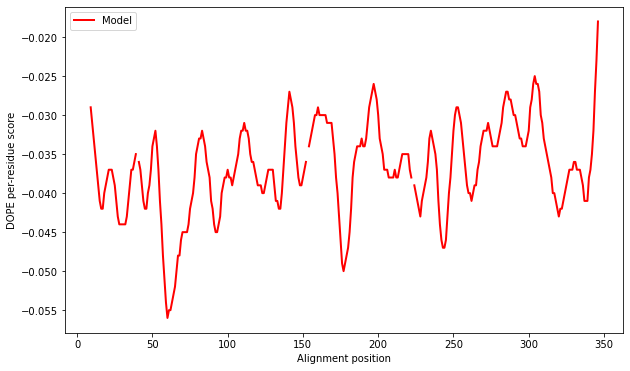

In [6]:
import pylab
import modeller

def r_enumerate(seq):
    """Enumerate a sequence in reverse order"""
    # Note that we don't use reversed() since Python 2.3 doesn't have it
    num = len(seq) - 1
    while num >= 0:
        yield num, seq[num]
        num -= 1

def get_profile(profile_file, seq):
    """Read `profile_file` into a Python array, and add gaps corresponding to
       the alignment sequence `seq`."""
    # Read all non-comment and non-blank lines from the file:
    f = open(profile_file)
    vals = []
    for line in f:
        if not line.startswith('#') and len(line) > 10:
            spl = line.split()
            vals.append(float(spl[-1]))
    # Insert gaps into the profile corresponding to those in seq:
    for n, res in r_enumerate(seq.residues):
        for gap in range(res.get_leading_gaps()):
            vals.insert(n, None)
    # Add a gap at position '0', so that we effectively count from 1:
    vals.insert(0, None)
    return vals

e = modeller.environ()
a = modeller.alignment(e, file='TvLDH-mult.ali')

#only uncomment the next, if you have generated profile for templates
#template = get_profile('mult.profile', a['mult'])
model = get_profile('TvLDH.profile', a['TvLDH'])

# Plot the template and model profiles in the same plot for comparison:
pylab.figure(1, figsize=(10,6))
pylab.xlabel('Alignment position')
pylab.ylabel('DOPE per-residue score')
pylab.plot(model, color='red', linewidth=2, label='Model')
#only uncomment the next, if you have generated profile for templates
#pylab.plot(template, color='green', linewidth=2, label='Template')
pylab.legend()
pylab.savefig('dope_profile.png', dpi=65)

### Visually compare the model vs templates 

In [ ]:
#interactively view molecular structures and trajectories
!conda install nglview -c conda-forge

In [ ]:
# if you already installed nglview, you can `upgrade`
!conda upgrade nglview --force

In [ ]:
!jupyter labextension install  nglview-js-widgets

In [ ]:
#run this if installed nglview via pip install
!jupyter-nbextension enable nglview --py --sys-prefix

In [8]:
import nglview as nv

_ColormakerRegistry()

In [9]:
view = nv.NGLWidget()

#load the model/ all models
view.add_component('TvLDH.B99990001.pdb')
view.add_component('TvLDH.B99990002.pdb')
view.add_component('TvLDH.B99990003.pdb')
view.add_component('TvLDH.B99990004.pdb')
view.add_component('TvLDH.B99990005.pdb')
view.background = 'white'

#view.stage.set_parameters(mouse_preset='coot')
#view.color_by('ssctr')
view

#mouse hover on the chains to know the atoms|PDBID|residue ID|etc
#scroll to zoom
#click and drag to rotate

NGLWidget()

In [10]:
view1 = nv.NGLWidget()

#load the best model
view1.add_component('TvLDH.B99990001.pdb')

#load the templates
view1.add_component('4h7p_fit.pdb')
view1.add_component('1bdm_fit.pdb')
view1.add_component('3d5t_fit.pdb')
view1.add_component('5mdh_fit.pdb')
view1.add_component('6itk_fit.pdb')
view1.add_component('7mdh_fit.pdb')
view1.background = 'white'

#view.stage.set_parameters(mouse_preset='coot')
view1.color_by('chain')
view1

#mouse hover on the chains to know the atoms|PDBID|residue ID|etc
#scroll to zoom
#click and drag to rotate

NGLWidget()

NOTE: The notebook is not yet completed. Multi template profile to generated and plots to be generated.
Loop refinement will be uploaded once this notebook is complete! Thanks for your patience!

## This notebook is compiled and verfied by Girinath G. Pillai, @giribio

### Kindly cite this notebook in your publications if you have used it for calculations.

### Cite as : NyroMDNotebook v1, Girinath G. Pillai : https://github.com/giribio/MDNotebooks